<a href="https://colab.research.google.com/github/ethsd/build-a-wallet-1/blob/main/Build_a_Simple_Ethereum_Wallet_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Build a Simple  Ethereum Wallet From Scratch!

https://bit.ly/3LlnwDj 

## Outline

## Part 1: Create an  Ethereum Account
- What is a wallet
- Public key cryptography
- Generate a private key (Randomness)
- Sign private key (Elliptic Curve cryptography)
- Hash Functions

##  Part 2: Executing Transactions
- Faucets, receiving funds in your new wallet
- Infura setup (optional) / connect to Kovan
- Check balance
- Send funds (submit a transaction)
- Review transaction details (etherscan)

# Part 1

## What is a wallet?

https://ethereum.org/en/wallets/

"Ethereum wallets are applications that let you interact with your Ethereum  account."

##  Public Key Cryptography

https://www.youtube.com/watch?v=AQDCe585Lnc

# Overview of Ethereum Address Creation

https://www.massmux.com/private-and-public-keys-on-ethereum/

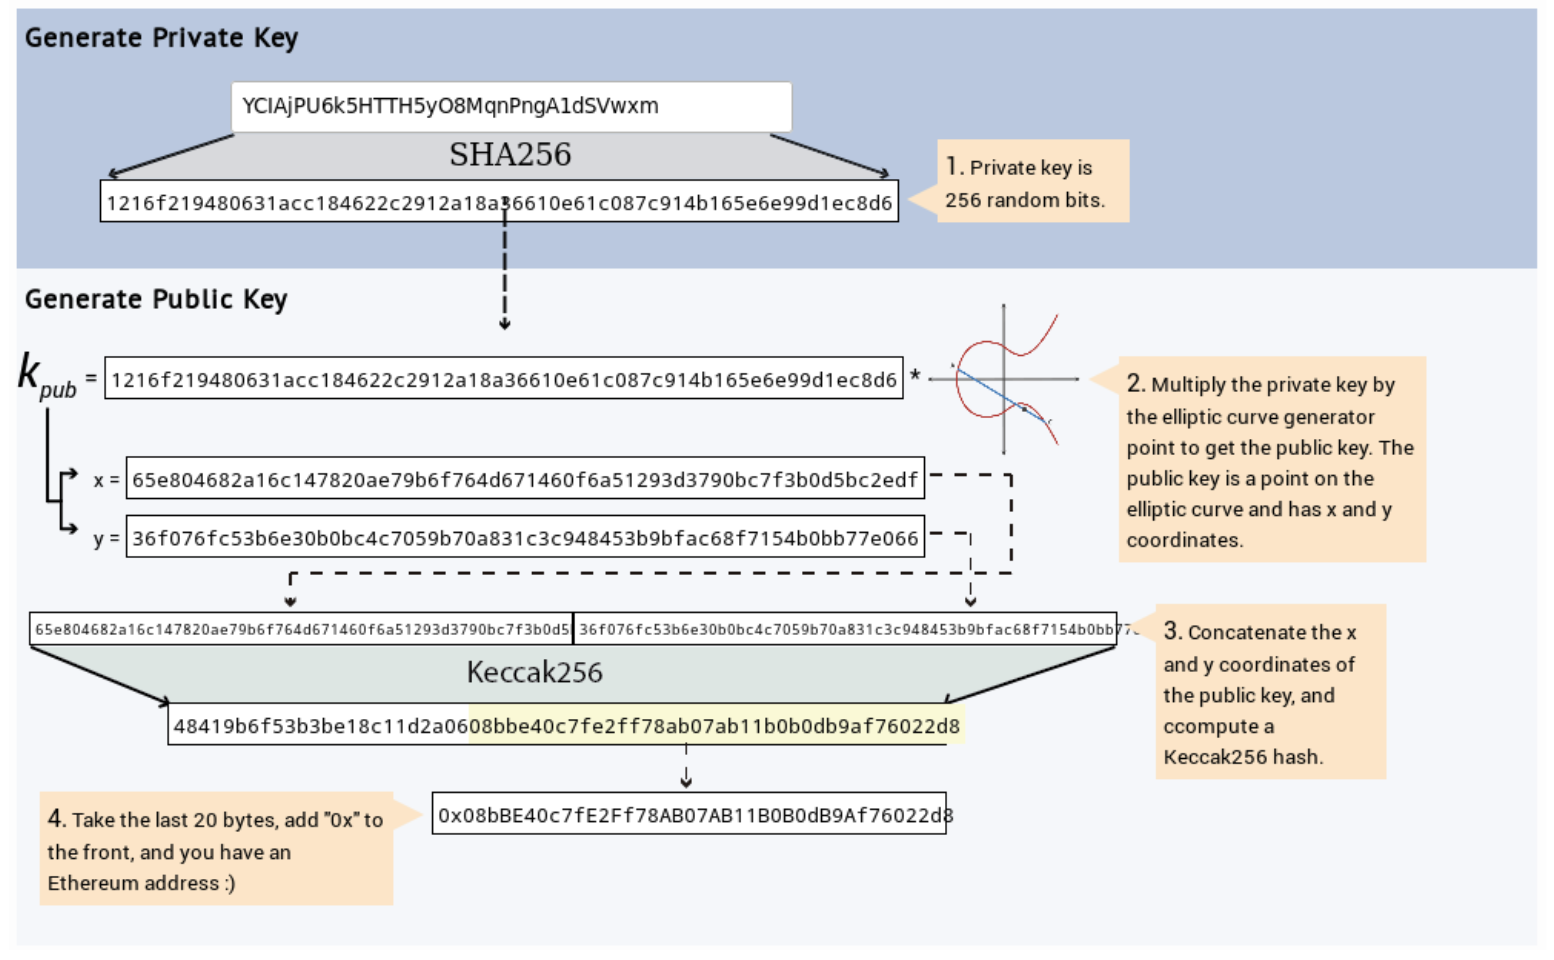

# Generate a private key (using randomness)

In [ ]:
import random

In [ ]:
bits = random.getrandbits(256)

In [ ]:
bits

38175059206863837830041847549274233022568544228295803543599908591759251006256

In [ ]:
type(bits)

int

In [ ]:
bits_hex = hex(bits)

In [ ]:
bits_hex

'0x85ae66c7ae3cf8dff300340c8fa469436bbd73a4a2b1bbcfac33240bdae1c4a4'

In [ ]:
type(bits_hex)

str

## NOTE

Software languages use different types of data depending on what operation/computation/manipulation is being executed.

Specific python libraries expect inputs to be of a certain type, but we can usually accomplish our programming goals in more than one way... 

## But don't worry!

We don't need to know python types to learn and build our own Ethereum wallet! 

This time, you'll have to trust the programmer did things correctly (or your eth back, guaranteed!)


##  Not  all  randomness is cryptographically secure...

We will use import a different module, called secrets to (more) securely generate random bits

In [ ]:
import secrets
bits = secrets.randbits(256)
random_secret = hex(bits)[2:]

In [ ]:
random_secret

'bcacd52a89a3f0e965c72cc1412018f72dc67518d4063dc3f523f65bf8364495'

In [ ]:
# random_secret = '5c82c45fdbb6501f89c1356b0bf14bb2cfecf74804e8eaa68160e40c53d91c20'

## What is an  elliptic curve cryptography?

https://onyb.gitbook.io/secp256k1-python/ecdsa

https://www.youtube.com/watch?v=muIv8I6v1aE

In order to validate a private key for generating an ethereum address, we will check to make sure it is a positive integer on the  secp2561 curve (ie, check that it is less than the curve order).

In [ ]:
CURVE_ORDER_HEX  = 'FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFEBAAEDCE6AF48A03BBFD25E8CD0364141'
CURVE_ORDER_INT = int(CURVE_ORDER_HEX, 16)

In [ ]:
# NOTE: type changing from hex string to int
if 0 < int(random_secret,16) < CURVE_ORDER_INT:
    print(True)
    priv_key = random_secret

True


In [ ]:
!pip install ecdsa
import ecdsa

     |████████████████████████████████| 119 kB 5.2 MB/s 


In [ ]:
# NOTE: type changing from hex string to bytes
priv_key_bytes = bytes.fromhex(priv_key)

##  What  does it mean to "sign" a private key via an Elliptic Curve?

In summary, an ECDSA (Elliptic Curve Digital Signature Algorithm) involves multiplying your private key (S) by a (not so) special point on the curve called a Generator (G) to get the public key (P).

S*G=P

Roughly speaking, it turns out that every point on the curve is a Generator point. Math theory tells us that the multiplication of a Generator with another integer will result in another point on the curve. 

Every point on the curve has two coordinates (X and Y). Our public key is  created by simply contacenating the X and Y together. So if  X=1234  and Y=5678, P=12345678

# Derive the public key (from the private key)

In [ ]:
pub_key = ecdsa.SigningKey.from_string(priv_key_bytes, curve=ecdsa.SECP256k1).verifying_key

In [ ]:
# NOTE: type changing from bytes to int, then back to a hex string
pub_key_bytes = pub_key.to_string()
pub_key_int = int.from_bytes(pub_key_bytes, "big")
pub_key =  hex(pub_key_int)

In [ ]:
pub_key

'0x164e8a007fe6357c0c441149abf1f6ea14d548b48fe1f265a101de44e4f4129eb116cc397a525b4260e42e95b233d22a4215694dbb411e40a55883dfc5a6d150'

# Create an Ethereum Address (from the public key)



### What is a hash function?

1. Transform variable length inputs to outputs of fixed size (usually much smaller).
2. Good hash functions are collision resistant (different inputs shouldn't result in the same output)
3. Not all hash functions are cryptographically secure!






https://www.youtube.com/watch?v=cczlpiiu42M



## Example of a  hash function

In [ ]:
import sys

### We'll  use our public key are our input (also known as the preimage)

In [ ]:
pub_key_bytes

b'\x16N\x8a\x00\x7f\xe65|\x0cD\x11I\xab\xf1\xf6\xea\x14\xd5H\xb4\x8f\xe1\xf2e\xa1\x01\xdeD\xe4\xf4\x12\x9e\xb1\x16\xcc9zR[B`\xe4.\x95\xb23\xd2*B\x15iM\xbbA\x1e@\xa5X\x83\xdf\xc5\xa6\xd1P'

#### The size of our preimage is 97 bytes!

In [ ]:
sys.getsizeof(pub_key_bytes)

97

In [ ]:
simple_hash_of_pub_key = hash(pub_key_bytes)

### Check out our output  (also known as the digest)

In [ ]:
simple_hash_of_pub_key

-3164493540326757810

#### The size of our digest is 36 bytes!

In [ ]:
sys.getsizeof(simple_hash_of_pub_key)

36

###  NOTE:

This is more or less how we get from a public key to an Ethereum address, but the Etheruem  standard requires us to use a more advanced and cryptographically secure hash function

KECCAK256!

https://keccak.team/keccak.html

https://emn178.github.io/online-tools/keccak_256.html


## Okay, let's create our Ethereum address  for real!

In [ ]:
!pip install pycryptodome
from Crypto.Hash import keccak

     |████████████████████████████████| 2.0 MB 5.0 MB/s 


In [ ]:
keccak_hash = keccak.new(digest_bits=256)
#
eth_address = keccak_hash.update(pub_key_bytes).digest()[-20:]
keccak_digest = keccak_hash.digest()

In [ ]:
# NOTE: type changing from bytes to int, and back to hex string again :)
eth_address_int = int.from_bytes(eth_address, "big")
eth_address = hex(eth_address_int)

##  Voila! Your very own homemade ethereum address

In [ ]:
eth_address

NameError: ignored

# Part 2

## Setup Infura  (optional)

1. Go  to https://infura.io/
2. Make an account
3. Create a new project
4. Settings -> endpoint -> Kovan -> copy URL

Or, just use this one :)

In [ ]:
infura_endpoint = 'https://kovan.infura.io/v3/4198bc3270fd4d939b7da2073b095a99'

## Request test ETH from a Kovan Faucet

https://ethdrop.dev/



## Let's connect to Ethereum  (Kovan test Network)

In [ ]:
w3 = Web3(Web3.HTTPProvider(infura_endpoint))

NameError: ignored

In [ ]:
w3.isConnected()

NameError: ignored

### What is a checksum address?

In summary, checkSummed addresses are less likely to be accidentally invalid, and  there are less likely for there to be collisions or (duplicate) addresses.


In [ ]:
my_eth_address = Web3.toChecksumAddress(eth_address)

In [ ]:
my_eth_address

In [ ]:
!pip install web3
from web3 import Web3

## Check the balance of  our new ETH address

In [ ]:
w3.fromWei(w3.eth.get_balance(my_eth_address),'ether')

NameError: ignored

Hey that's pretty neat, our homemade wallet actually received funds from the faucet. One important thing to note here is that we were able to READ our account balance from the network  (blockchain) without executing a transaction!

In [ ]:
nonce = w3.eth.getTransactionCount(my_eth_address)

In [ ]:
nonce

0

## Send ETH to a friend!

In [ ]:
address2 = Web3.toChecksumAddress('0x7b02e84ab02c0f5d50462fbadB1f8F87Bd891Ee3')

sending eth from one address to another requires us to execute a transaction (ie WRITE) to the  blockchain. Hence, we will need to fill out our transaction details...

- nonce: A nonce is a one time number often used as a counter. When submitting a transaction, it allows Ethereum nodes (miners) to know what your intended order of transactions is.

- to: The address (mailbox) of the intended recipient.

- value: The amount of funds your are sending

- gas: Is a unit that represents computational effort. When miners receive an appropriate gas payment, they will add your transactions to the next block.

- gasPrice: Is the amount you are willing to pay per unit of gas (in Gwei)

- gasLimit: Total amount you are willing to pay for your entire transaction


When miners receive an appropriate gas payment, they will add your transactions to the next block.

Estimating accurate gas price is a notoriously hard challenge in Ethereum applications

### Let's take another quick detour to Ethereum.org to learn about gas

https://ethereum.org/en/developers/docs/gas/#:~:text=A%20standard%20ETH%20transfer%20requires,get%20back%20the%20remaining%2029%2C000.

### Wei vs Gwei?

- 1 ether = 1000000000000000000 wei (10e18)
- 1 ether = 1000000000 gwei (10e9)


In [ ]:
tx = {
    'nonce':nonce,
    'to':address2,
    'value': w3.toWei(0.00001, 'ether'),
    'gas': 21000,
    'gasPrice': w3.toWei(4, 'gwei')
}

## Sign & execute your transaction!

Transactions are signed using our private key. 

In [ ]:
signed_tx = w3.eth.account.signTransaction(tx,priv_key)
tx_hash = w3.eth.sendRawTransaction(signed_tx.rawTransaction)

In [ ]:
signed_tx.rawTransaction

HexBytes('0xf8690184ee6b280082520894baab3895120a2d512529911c528a9f4786d75ac38609184e72a000801ca05a92adc568d84f5a27da2dac69b6da3e820ff5d60fd5070140ad3e79395ec1bba04efa4a769cd2ee04dc36dfceb4c30f415ae7bc00ec07e6fa5e35819bb357f563')

## View your  transaction on Etherscan

- copy and paste your transaction hash into the search bar on etherscan
https://kovan.etherscan.io/

# New Section

In [ ]:
tx_hash

HexBytes('0x3d624cc0775728e795a353d9dc52fa6f700739f2afb8788f2a42531ba4f389b0')

- You can also view a transaction receipt using your web3 client...

In [ ]:
w3.eth.getTransactionReceipt(tx_hash)

AttributeDict({'blockHash': HexBytes('0x2a5e8b0604945caf7fe1fb32dbb0f15bcb741125f2f1f6f268a212091461efac'),
 'blockNumber': 31145166,
 'contractAddress': None,
 'cumulativeGasUsed': 21000,
 'effectiveGasPrice': 4000000000,
 'from': '0xcBE0d718A027dFB9E7c37C06833e56EB8178FE2b',
 'gasUsed': 21000,
 'logs': [],
 'logsBloom': HexBytes('0x00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000'),
 'status': 1,
 'to': '0xbAaB3895120a2d512529911c528a9F4786D75Ac3',
 'transactionHash': HexBytes('0x3d624cc0775728e795a353d9dc52fa6f700739f2afb8788f2